In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
# read all data
data2015 = pd.read_csv('2015.csv')
data2016 = pd.read_csv('2016.csv')
data2017 = pd.read_csv('2017.csv')
data2018 = pd.read_csv('2018.csv')
data2019 = pd.read_csv('2019.csv')

In [6]:
# check columns for each data
df_col = pd.DataFrame([data2015.columns,data2016.columns,data2017.columns,data2018.columns,data2019.columns]).T
df_col.columns = ['2015','2016','2017','2018','2019']
df_col

,2015,2016,2017,2018,2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


# From the dataframe above, we only discuss the key variables. We select Happiness Score as the dependent variable y, and set [economy,family,health,freedom,trust,generosity] as variable X.


In [7]:
# clean the data and reset their names
data2015 = data2015.drop(['Region','Standard Error'],axis=1)
data2015.columns = ['country','Hrank','Hscore','economy','family','health','freedom','trust','generosity','residual']

data2016 = data2016.drop(data2016.columns[[4,5]],axis=1)
data2016.drop(['Region'],axis=1,inplace=True)
data2016.columns = data2015.columns

data2017 = data2017.drop(data2017.columns[3:5],axis=1)
trust = data2017.iloc[:,8]
data2017 = data2017.drop(data2017.columns[8],axis=1)
data2017.insert(7,'trust',trust)
data2017.columns = ['country','Hrank','Hscore','economy','family','health','freedom','trust','generosity','residual']

trust = data2018.iloc[:,8]
data2018 = data2018.drop(data2018.columns[8],axis=1)
data2018.insert(7,'trust',trust)
data2018.columns = ['Hrank','country','Hscore','economy','family','health','freedom','trust','generosity']

trust = data2019.iloc[:,8]
data2019 = data2019.drop(data2019.columns[8],axis=1)
data2019.insert(7,'trust',trust)
data2019.columns = ['Hrank','country','Hscore','economy','family','health','freedom','trust','generosity']

In [8]:
# check and delete nulls
print(data2015.isnull().sum().sum())
print(data2016.isnull().sum().sum())
print(data2017.isnull().sum().sum())
print(data2018.isnull().sum().sum())
print(data2019.isnull().sum().sum())

0
0
0
1
0


In [9]:
print(data2018.isnull().sum())

Hrank         0
country       0
Hscore        0
economy       0
family        0
health        0
freedom       0
trust         1
generosity    0
dtype: int64


In [10]:
data2018.trust = data2018.trust.fillna(data2018.trust.mean())

In [11]:
# find the most happinest countries
print('The Most Happinest Countries:')
df = pd.DataFrame(columns = df_col.columns)
df.iloc[:,0] = data2015['country'][:5]
df.iloc[:,1] = data2016['country'][:5]
df.iloc[:,2] = data2017['country'][:5]
df.iloc[:,3] = data2018['country'][:5]
df.iloc[:,4] = data2019['country'][:5]
df.set_index(np.arange(1,6),inplace = True)
df

The Most Happinest Countries:


,2015,2016,2017,2018,2019
1,Switzerland,Denmark,Norway,Finland,Finland
2,Iceland,Switzerland,Denmark,Norway,Denmark
3,Denmark,Iceland,Iceland,Denmark,Norway
4,Norway,Norway,Switzerland,Iceland,Iceland
5,Canada,Finland,Finland,Switzerland,Netherlands


In [12]:
# find countries with the highest score for each aspect
l = [data2015,data2016,data2017,data2018,data2019]
print('The Most Excellent Country in each Aspect：')
df2 = pd.DataFrame(columns = df_col.columns,index = data2018.columns[3:])
for i in range(6):
    for j in range(5):
        index = data2018.columns[3+i]
        df2.iloc[i,j] = l[j][l[j][index]==l[j][index].max()].country.values[0]
df2

The Most Excellent Country in each Aspect：


,2015,2016,2017,2018,2019
economy,Qatar,Qatar,Qatar,United Arab Emirates,Qatar
family,Iceland,Iceland,Iceland,Iceland,Iceland
health,Singapore,Hong Kong,Singapore,Hong Kong,Singapore
freedom,Norway,Uzbekistan,Uzbekistan,Uzbekistan,Uzbekistan
trust,Rwanda,Rwanda,Singapore,Singapore,Singapore
generosity,Myanmar,Myanmar,Myanmar,Myanmar,Myanmar


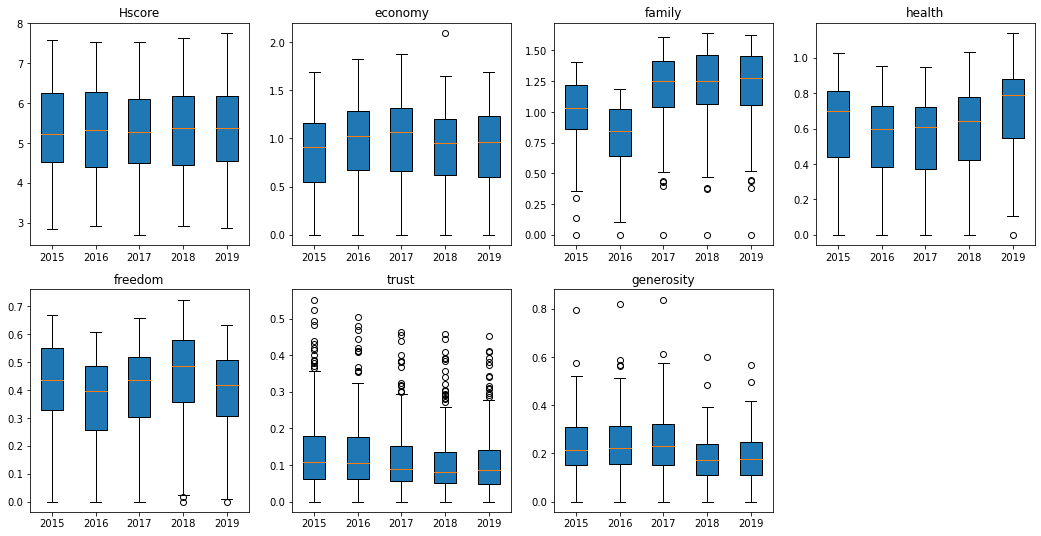

In [13]:
# Draw boxplots to show how do the variables vary between years
fig,axs = plt.subplots(2,4,figsize=(18,9))
a = 0
b = 0
for i in range(7):
    index = data2018.columns[i+2]
    axs[a][b].boxplot([data2015[index],data2016[index],data2017[index],data2018[index],data2019[index]],labels=df_col.columns,patch_artist=True)
    axs[a][b].set_title(index)
    if b==3:
        b=0
        a+=1
    else:
        b+=1
plt.delaxes(axs[1][3])
plt.show()

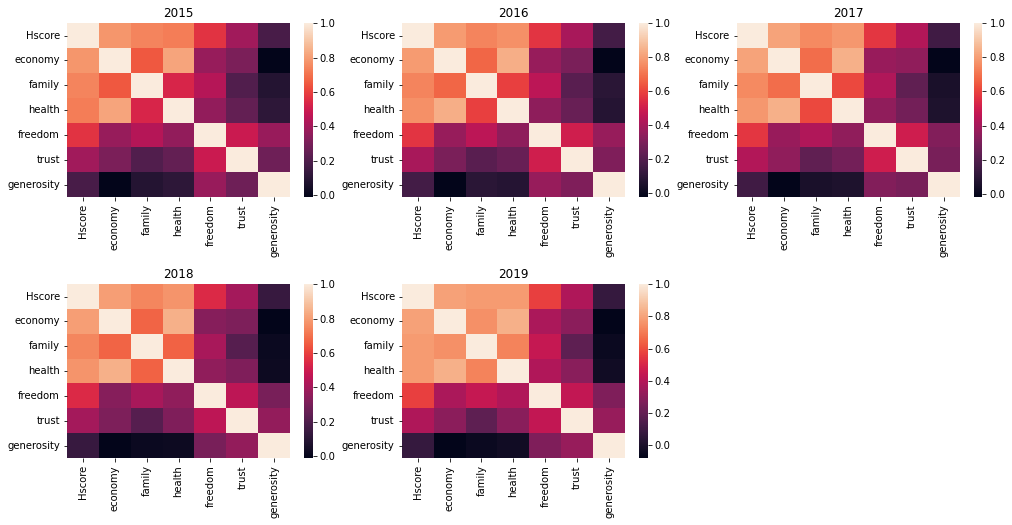

In [14]:
# Draw heatmaps to show how the variables correlate between years
a = 0
b = 0
fig,axs =plt.subplots(2,3,figsize=(17,8))
for i in range(5):
    sns.heatmap(l[i][data2018.columns[2:9]].corr(),ax=axs[a][b])
    axs[a][b].set_title(df_col.columns[i])
    if b==2:
        b=0
        a+=1
    else:
        b+=1
plt.subplots_adjust(wspace=0.2, hspace=0.5)                     
plt.delaxes()
plt.show()

# #We can see that economy, health and family have the most impact on happinest score. Then we model to study the impact mechanism.

In [15]:
# Set X and Y
list_x = list(data2018.columns[3:])
X_2015 = data2015[list_x]
X_2016 = data2016[list_x]
X_2017 = data2017[list_x]
X_2018 = data2018[list_x]
X_2019 = data2019[list_x]
X_train = pd.concat([X_2015,X_2016,X_2017,X_2018]).reset_index().drop('index',axis=1)
X_test = pd.DataFrame(X_2019)

y_train = pd.concat([data2015.Hscore,data2016.Hscore,data2017.Hscore,data2018.Hscore]).reset_index().drop('index',axis=1)
y_test = pd.DataFrame(data2019.Hscore)

# We first do principle component analysis and then do linear regression to predict happiness score.¶

In [16]:
# Standardize the training set 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)

In [17]:
# Extract principle component, named X_train1
pca = PCA(n_components=4)
X_train1 = pca.fit_transform(X_train_std)
X_train1 = pd.DataFrame(X_train1)

In [18]:
# Use X_train2 to do linear regression
reg = LinearRegression()
reg.fit(X_train1,y_train)

# Come to modeling result
print('Regression Coefficient：',reg.coef_)
print('')
print('Training Score：',reg.score(X_train1,y_train))
print('')
print('Explained Variance Ratio: ',pca.explained_variance_ratio_)  
print('')
print('PCA Coefficient: ')
print(pca.components_)

Regression Coefficient： [[-0.58891465 -0.09530444  0.03447312 -0.07095749]]

Training Score： 0.7612180717626387

Explained Variance Ratio:  [0.45998679 0.22405181 0.11362814 0.10852681]

PCA Coefficient: 
[[-5.04540167e-01 -4.38525886e-01 -4.99068131e-01 -4.16926862e-01
  -3.32172570e-01 -1.41062546e-01]
 [-2.92426007e-01 -2.62886154e-01 -2.51268727e-01  3.23279845e-01
   4.78484606e-01  6.69913838e-01]
 [ 3.10615109e-01 -5.76579849e-01  2.95845924e-01 -4.81962889e-01
   4.91543852e-01 -9.82116937e-02]
 [-1.63522319e-01 -6.47215500e-04 -2.77943949e-01  3.76542931e-01
   4.96728207e-01 -7.12378904e-01]]


In [19]:
# Check modeling score on testing set 
X_test_std = ss.fit_transform(X_test)
X_test1 = pca.fit_transform(X_test_std)
X_test1 = pd.DataFrame(X_test1)
print('Testing Score：',reg.score(X_test1,y_test))

Testing Score： 0.7703559980827357
